<a href="https://colab.research.google.com/github/komarojugnanavi79-rgb/IV-sem-DM-prject/blob/main/review(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd

# -------------------------------
# Step 1: Load datasets
# -------------------------------
df1 = pd.read_csv("/content/data set 1.csv")
df2 = pd.read_csv("/content/data set 2.csv")
df3 = pd.read_csv("/content/data set 3.csv")

# -------------------------------
# Step 2: Make student_id common
# -------------------------------
df1.rename(columns={"StudentID": "student_id"}, inplace=True)
df2.rename(columns={"StudentID": "student_id"}, inplace=True)
df3.rename(columns={"StudentID": "student_id"}, inplace=True)

# -------------------------------
# Step 3: Remove duplicate IDs
# -------------------------------
df1 = df1.drop_duplicates(subset="student_id")
df2 = df2.drop_duplicates(subset="student_id")
df3 = df3.drop_duplicates(subset="student_id")

# -------------------------------
# Step 4: Merge ALL rows (OUTER JOIN)
# -------------------------------
merged_df = pd.merge(df1, df2, on="student_id", how="outer")
final_df = pd.merge(merged_df, df3, on="student_id", how="outer")

# -------------------------------
# Step 5: Sort for clean table
# -------------------------------
final_df = final_df.sort_values(by="student_id").reset_index(drop=True)

# -------------------------------
# Step 6: Handle missing values (optional)
# -------------------------------
# Convert numeric columns with NaNs to object type before filling to avoid FutureWarning
for col in final_df.select_dtypes(include=['number']).columns:
    if final_df[col].isnull().any():
        final_df[col] = final_df[col].astype(object)

final_df.fillna("Not Available", inplace=True)

# -------------------------------
# Step 7: Display & Save
# -------------------------------
print(final_df)
final_df.to_csv("final_student_merged_dataset.csv", index=False)

print("\n All rows from all three datasets are merged successfully!")

     student_id   CourseRating     Attendance DifficultyLevel  \
0         S0001            4.0            84%            Easy   
1         S0002            3.0            94%          Medium   
2         S0003            5.0            72%            Easy   
3         S0004            5.0            90%          Medium   
4         S0005            4.0            88%            Easy   
...         ...            ...            ...             ...   
1295      S1296  Not Available  Not Available   Not Available   
1296      S1297  Not Available  Not Available   Not Available   
1297      S1298  Not Available  Not Available   Not Available   
1298      S1299  Not Available  Not Available   Not Available   
1299      S1300  Not Available  Not Available   Not Available   

     CourseContentQuality AssignmentLoad ExamDifficulty     StudyHours  \
0                     3.0            Low           Hard            1.0   
1                     4.0       Moderate       Moderate            6.0 

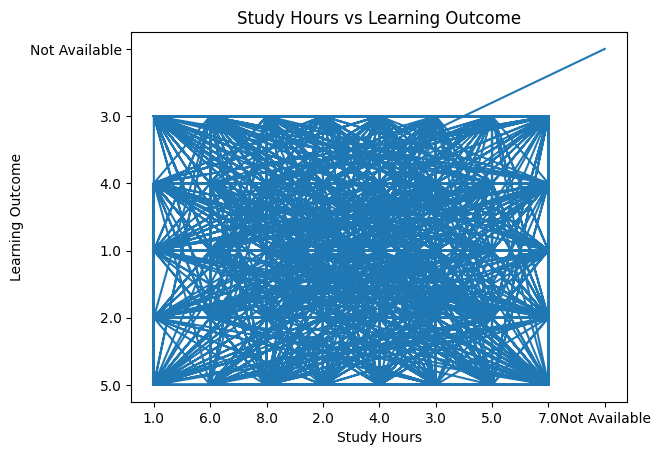

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load merged dataset
df = pd.read_csv("final_student_merged_dataset.csv")

# Remove rows with missing values for selected columns
df = df.dropna(subset=["StudyHours", "LearningOutcome"])

# Plot the graph
plt.figure()
plt.plot(df["StudyHours"], df["LearningOutcome"])
plt.xlabel("Study Hours")
plt.ylabel("Learning Outcome")
plt.title("Study Hours vs Learning Outcome")
plt.show()

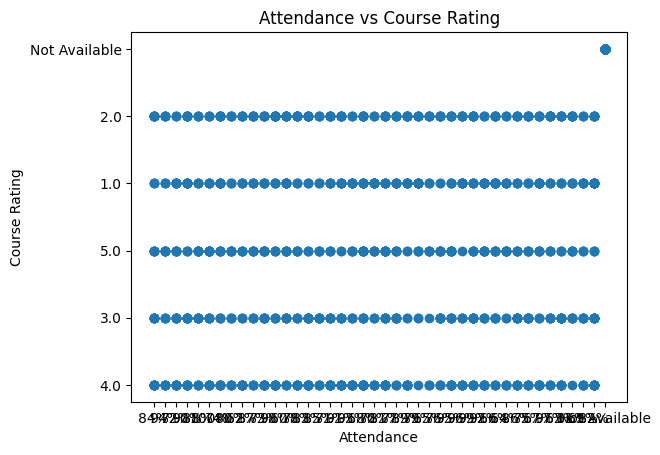

In [14]:
plt.figure()
plt.scatter(df["Attendance"], df["CourseRating"])
plt.xlabel("Attendance")
plt.ylabel("Course Rating")
plt.title("Attendance vs Course Rating")
plt.show()

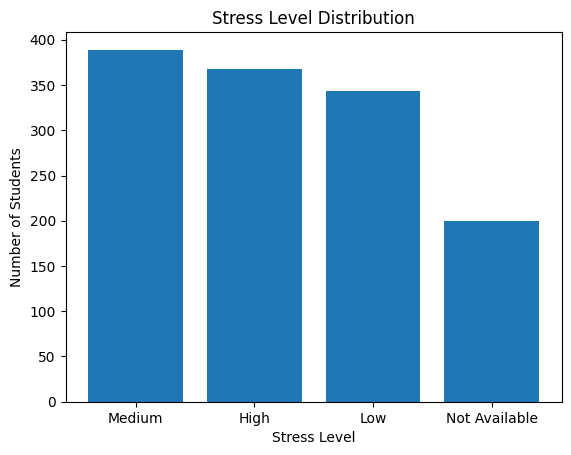

In [16]:
stress_count = df["StressLevel"].value_counts()

plt.figure()
plt.bar(stress_count.index, stress_count.values)
plt.xlabel("Stress Level")
plt.ylabel("Number of Students")
plt.title("Stress Level Distribution")
plt.show()

In [24]:
import pandas as pd

# Load datasets
df1 = pd.read_csv("/content/data set 1.csv")
df2 = pd.read_csv("/content/data set 2.csv")
df3 = pd.read_csv("/content/data set 3.csv")

# Make student_id common
df1.rename(columns={"StudentID": "student_id"}, inplace=True)
df2.rename(columns={"StudentID": "student_id"}, inplace=True)
df3.rename(columns={"StudentID": "student_id"}, inplace=True)

# Remove duplicate student IDs
df1 = df1.drop_duplicates(subset="student_id")
df2 = df2.drop_duplicates(subset="student_id")
df3 = df3.drop_duplicates(subset="student_id")

# Merge datasets (keep all rows)
final_df = pd.merge(df1, df2, on="student_id", how="outer")
final_df = pd.merge(final_df, df3, on="student_id", how="outer")

# Sort data
final_df = final_df.sort_values(by="student_id").reset_index(drop=True)

# SHOW OUTPUT
print("Merged Dataset (first 5 rows):")
print(final_df.head())

print("\nTotal Rows and Columns:")
print(final_df.shape)

# Save dataset
final_df.to_csv("final_student_merged_dataset.csv", index=False)

print("\n✅ Output displayed and dataset saved successfully!")

Merged Dataset (first 5 rows):
  student_id  CourseRating Attendance DifficultyLevel  CourseContentQuality  \
0      S0001           4.0        84%            Easy                   3.0   
1      S0002           3.0        94%          Medium                   4.0   
2      S0003           5.0        72%            Easy                   2.0   
3      S0004           5.0        90%          Medium                   3.0   
4      S0005           4.0        88%            Easy                   1.0   

  AssignmentLoad ExamDifficulty  StudyHours SatisfactionLevel WouldRecommend  \
0            Low           Hard         1.0              High             No   
1       Moderate       Moderate         6.0              High             No   
2           High           Easy         8.0               Low             No   
3       Moderate           Easy         2.0            Medium             No   
4           High           Easy         2.0            Medium             No   

  StressLevel

In [26]:
import pandas as pd

# Load dataset
df = pd.read_csv("final_student_merged_dataset.csv")

# -------------------------------
# Replace NULL values
# -------------------------------

# Numeric columns → replace with mean
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Categorical columns → replace with mode
cat_cols = df.select_dtypes(include=["object"]).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Save updated dataset
df.to_csv("final_student_null_replaced.csv", index=False)

print("✅ Null values replaced successfully!")

✅ Null values replaced successfully!


In [27]:
import pandas as pd

# Load dataset
df = pd.read_csv("final_student_merged_dataset.csv")

# Replace NULL values
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# SHOW OUTPUT
print("Updated Dataset (first 5 rows):")
print(df.head())

print("\nRemaining NULL values in each column:")
print(df.isnull().sum())

# Save updated dataset
df.to_csv("final_student_null_replaced.csv", index=False)

print("\n✅ Data displayed and file saved successfully!")

Updated Dataset (first 5 rows):
  student_id  CourseRating Attendance DifficultyLevel  CourseContentQuality  \
0      S0001           4.0        84%            Easy                   3.0   
1      S0002           3.0        94%          Medium                   4.0   
2      S0003           5.0        72%            Easy                   2.0   
3      S0004           5.0        90%          Medium                   3.0   
4      S0005           4.0        88%            Easy                   1.0   

  AssignmentLoad ExamDifficulty  StudyHours SatisfactionLevel WouldRecommend  \
0            Low           Hard         1.0              High             No   
1       Moderate       Moderate         6.0              High             No   
2           High           Easy         8.0               Low             No   
3       Moderate           Easy         2.0            Medium             No   
4           High           Easy         2.0            Medium             No   

  StressLeve

In [28]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# -------------------------------
# Load merged dataset
# -------------------------------
df = pd.read_csv("final_student_merged_dataset.csv")

# -------------------------------
# 1. REMOVE DUPLICATE ROWS
# -------------------------------
df = df.drop_duplicates()

# -------------------------------
# 2. HANDLE MISSING VALUES
# -------------------------------

# Numerical columns – fill with mean
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Categorical columns – fill with mode
cat_cols = df.select_dtypes(include=["object"]).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# -------------------------------
# 3. CONVERT CATEGORICAL VALUES
# -------------------------------
label_encoder = LabelEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

# -------------------------------
# 4. NORMALIZE NUMERICAL DATA
# -------------------------------
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# -------------------------------
# Save preprocessed dataset
# -------------------------------
df.to_csv("final_student_preprocessed_dataset.csv", index=False)

print("✅ Data preprocessing completed successfully!")


✅ Data preprocessing completed successfully!


In [30]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# -------------------------------
# 1. Load datasets
# -------------------------------
df1 = pd.read_csv("/content/data set 1.csv")
df2 = pd.read_csv("/content/data set 2.csv")
df3 = pd.read_csv("/content/data set 3.csv")

# -------------------------------
# 2. Make student_id common
# -------------------------------
df1.rename(columns={"StudentID": "student_id"}, inplace=True)
df2.rename(columns={"StudentID": "student_id"}, inplace=True)
df3.rename(columns={"StudentID": "student_id"}, inplace=True)

# -------------------------------
# 3. Remove duplicate entities
# -------------------------------
df1 = df1.drop_duplicates()
df2 = df2.drop_duplicates()
df3 = df3.drop_duplicates()

# -------------------------------
# 4. Merge (union) datasets
# -------------------------------
merged_df = pd.merge(df1, df2, on="student_id", how="outer")
final_df = pd.merge(merged_df, df3, on="student_id", how="outer")

# -------------------------------
# 5. Reindex dataset
# -------------------------------
final_df = final_df.reset_index(drop=True)

# -------------------------------
# 6. Handle missing values
# -------------------------------
num_cols = final_df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = final_df.select_dtypes(include=["object"]).columns

final_df[num_cols] = final_df[num_cols].fillna(final_df[num_cols].mean())
final_df[cat_cols] = final_df[cat_cols].fillna(final_df[cat_cols].mode().iloc[0])

# -------------------------------
# 7. Convert categorical values
# -------------------------------
encoder = LabelEncoder()
for col in cat_cols:
    final_df[col] = encoder.fit_transform(final_df[col])

# -------------------------------
# 8. Normalize numerical data
# -------------------------------
scaler = MinMaxScaler()
final_df[num_cols] = scaler.fit_transform(final_df[num_cols])

# -------------------------------
# 9. Verify same number of columns
# -------------------------------
print("✅ Total number of columns:", final_df.shape[1])
print("Column names:")
print(final_df.columns.tolist())

# -------------------------------
# 10. Show output
# -------------------------------
print("\nFinal Processed Dataset (first 10 rows):")
print(final_df.head(10))

print("\nCheck for remaining NULL values:")
print(final_df.isnull().sum())

# -------------------------------
# 11. Save final dataset
# -------------------------------
final_df.to_csv("final_student_processed_dataset.csv", index=False)

print("\n✅ Data preprocessing, transformation, and verification completed successfully!")

✅ Total number of columns: 19
Column names:
['student_id', 'CourseRating', 'Attendance', 'DifficultyLevel', 'CourseContentQuality', 'AssignmentLoad', 'ExamDifficulty', 'StudyHours', 'SatisfactionLevel', 'WouldRecommend', 'StressLevel', 'LearningOutcome', 'SupportServicesRating', 'TeachingMethod', 'ClarityScore', 'InteractionScore', 'PaceOfTeaching', 'UseOfTechnology', 'DoubtResolution']

Final Processed Dataset (first 10 rows):
   student_id  CourseRating  Attendance  DifficultyLevel  \
0           0          0.75          25                0   
1           1          0.50          35                2   
2           2          1.00          13                0   
3           3          1.00          31                2   
4           4          0.75          29                0   
5           5          0.75           0                0   
6           6          0.00          15                2   
7           7          1.00          21                0   
8           8          0.75 

In [32]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# -------------------------------
# 1. Load the three datasets
# -------------------------------
df1 = pd.read_csv("/content/data set 1.csv")
df2 = pd.read_csv("/content/data set 2.csv")
df3 = pd.read_csv("/content/data set 3.csv")

# -------------------------------
# 2. Make student_id common
# -------------------------------
df1.rename(columns={"StudentID": "student_id"}, inplace=True)
df2.rename(columns={"StudentID": "student_id"}, inplace=True)
df3.rename(columns={"StudentID": "student_id"}, inplace=True)

# -------------------------------
# 3. Remove duplicate entities
# -------------------------------
df1 = df1.drop_duplicates()
df2 = df2.drop_duplicates()
df3 = df3.drop_duplicates()

# -------------------------------
# 4. Merge (Union) datasets using outer join
# -------------------------------
merged_df = pd.merge(df1, df2, on="student_id", how="outer")
final_df = pd.merge(merged_df, df3, on="student_id", how="outer")

# -------------------------------
# 5. Reindex dataset
# -------------------------------
final_df = final_df.reset_index(drop=True)

# -------------------------------
# 6. Handle missing values
# -------------------------------
num_cols = final_df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = final_df.select_dtypes(include=["object"]).columns

# Numeric → fill with mean
final_df[num_cols] = final_df[num_cols].fillna(final_df[num_cols].mean())
# Categorical → fill with mode
final_df[cat_cols] = final_df[cat_cols].fillna(final_df[cat_cols].mode().iloc[0])

# -------------------------------
# 7. Convert categorical to numeric
# -------------------------------
encoder = LabelEncoder()
for col in cat_cols:
    final_df[col] = encoder.fit_transform(final_df[col])

# -------------------------------
# 8. Normalize numerical data
# -------------------------------
scaler = MinMaxScaler()
final_df[num_cols] = scaler.fit_transform(final_df[num_cols])

# -------------------------------
# 9. Verify integration
# -------------------------------
print("✅ Total columns:", final_df.shape[1])
print("Column names:")
print(final_df.columns.tolist())
print("\nFirst 10 rows of integrated dataset:")
print(final_df.head(10))
print("\nCheck for remaining NULL values:")
print(final_df.isnull().sum())

# -------------------------------
# 10. Save integrated dataset
# -------------------------------
final_df.to_csv("final_student_integrated_dataset.csv", index=False)
print("\n✅ Data integration completed successfully!")

✅ Total columns: 19
Column names:
['student_id', 'CourseRating', 'Attendance', 'DifficultyLevel', 'CourseContentQuality', 'AssignmentLoad', 'ExamDifficulty', 'StudyHours', 'SatisfactionLevel', 'WouldRecommend', 'StressLevel', 'LearningOutcome', 'SupportServicesRating', 'TeachingMethod', 'ClarityScore', 'InteractionScore', 'PaceOfTeaching', 'UseOfTechnology', 'DoubtResolution']

First 10 rows of integrated dataset:
   student_id  CourseRating  Attendance  DifficultyLevel  \
0           0          0.75          25                0   
1           1          0.50          35                2   
2           2          1.00          13                0   
3           3          1.00          31                2   
4           4          0.75          29                0   
5           5          0.75           0                0   
6           6          0.00          15                2   
7           7          1.00          21                0   
8           8          0.75           3   

In [34]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA

# -------------------------------
# 1. Load transformed dataset
# -------------------------------
df = pd.read_csv("final_student_integrated_dataset.csv")

# -------------------------------
# 2. OPTIONAL: Select only relevant columns manually
# Example: keep only numeric columns and student_id
# -------------------------------
num_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
selected_cols = ['student_id'] + [col for col in num_cols if col != 'student_id']
reduced_df = df[selected_cols]

# -------------------------------
# 3. OPTIONAL: Dimensionality reduction using PCA
# Reduce numeric features to 5 principal components
# -------------------------------
pca = PCA(n_components=5)
pca_cols = [col for col in reduced_df.columns if col != 'student_id']
reduced_features = pca.fit_transform(reduced_df[pca_cols])

# Convert PCA result to DataFrame
pca_df = pd.DataFrame(reduced_features, columns=[f'PC{i+1}' for i in range(reduced_features.shape[1])])
pca_df['student_id'] = reduced_df['student_id'].values

# -------------------------------
# 4. Reindex and show output
# -------------------------------
pca_df = pca_df.reset_index(drop=True)
print("✅ Reduced Dataset (first 10 rows):")
print(pca_df.head(10))
print("\nDataset Shape:", pca_df.shape)

# -------------------------------
# 5. Save reduced dataset
# -------------------------------
pca_df.to_csv("final_student_reduced_dataset.csv", index=False)
print("\n✅ Dataset reduction completed successfully!")

✅ Reduced Dataset (first 10 rows):
         PC1       PC2       PC3       PC4       PC5  student_id
0   5.842127  0.115189 -0.201333 -1.014673 -0.384855           0
1  15.838751  0.832072  0.034733  0.373184 -1.013037           1
2  -6.144595 -0.722365 -0.798650 -0.989397 -0.457452           2
3  11.867977 -1.366326  0.449495  0.120959 -1.481725           3
4   9.860110 -1.004463 -0.310880 -1.345174 -0.422461           4
5 -19.154526 -0.504978  2.526922 -0.185710 -0.410281           5
6  -4.144952 -0.200703 -1.131901  0.396964 -1.905420           6
7   1.855536 -0.852510  0.720996 -1.299419 -0.787600           7
8 -16.149060 -0.399431 -1.018977 -0.107121 -0.030641           8
9   8.852290 -0.311484  0.658194  0.890347 -0.364697           9

Dataset Shape: (1300, 6)

✅ Dataset reduction completed successfully!


Columns in dataset: ['student_id', 'CourseRating', 'Attendance', 'DifficultyLevel', 'CourseContentQuality', 'AssignmentLoad', 'ExamDifficulty', 'StudyHours', 'SatisfactionLevel', 'WouldRecommend', 'StressLevel', 'LearningOutcome', 'SupportServicesRating', 'TeachingMethod', 'ClarityScore', 'InteractionScore', 'PaceOfTeaching', 'UseOfTechnology', 'DoubtResolution']


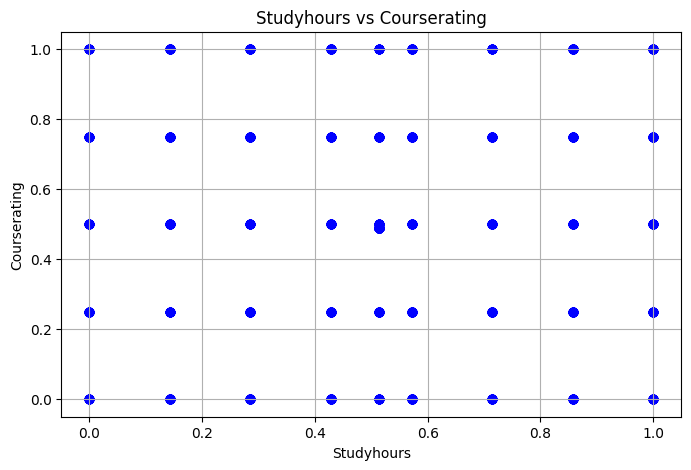

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (transformed or reduced)
df = pd.read_csv("final_student_integrated_dataset.csv")

# Optional: check columns
print("Columns in dataset:", df.columns.tolist())

# Choose two columns for the graph
# Example: 'study_hours' vs 'course_rating'
x_col = 'StudyHours'
y_col = 'CourseRating'

# Remove rows with missing values in these columns
df_plot = df[[x_col, y_col]].dropna()

# Plotting the graph
plt.figure(figsize=(8,5))
plt.scatter(df_plot[x_col], df_plot[y_col], color='blue')
plt.xlabel(x_col.replace("_", " ").title())
plt.ylabel(y_col.replace("_", " ").title())
plt.title(f'{x_col.replace("_", " ").title()} vs {y_col.replace("_", " ").title()}')
plt.grid(True)
plt.show()

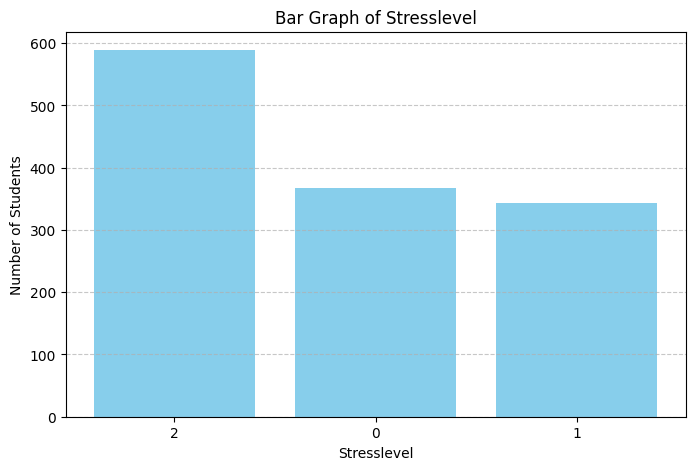

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("final_student_integrated_dataset.csv")

# Example: Bar graph for 'stress_level' (categorical) count
# Replace 'stress_level' with any column you want
col = 'StressLevel'

# Count the occurrences of each category
value_counts = df[col].value_counts()

# Plot bar graph
plt.figure(figsize=(8,5))
plt.bar(value_counts.index.astype(str), value_counts.values, color='skyblue')
plt.xlabel(col.replace("_", " ").title())
plt.ylabel("Number of Students")
plt.title(f"Bar Graph of {col.replace('_', ' ').title()}")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

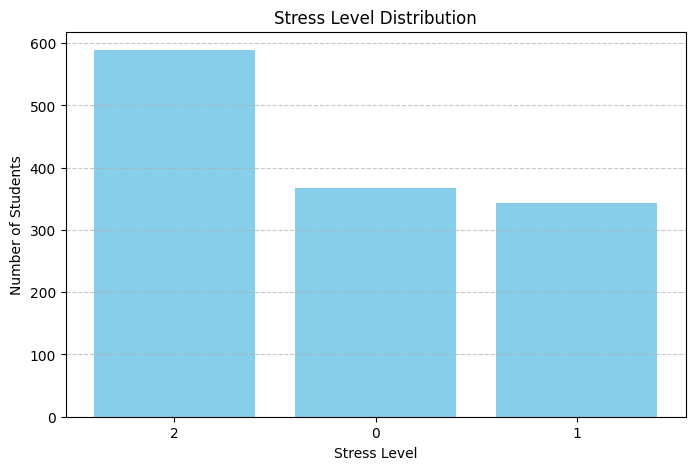

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your processed dataset
df = pd.read_csv("final_student_processed_dataset.csv")

# Example: Bar graph for 'stress_level' distribution
# Make sure column exists
if 'StressLevel' in df.columns:
    stress_count = df['StressLevel'].value_counts()

    plt.figure(figsize=(8,5))
    plt.bar(stress_count.index.astype(str), stress_count.values, color='skyblue')
    plt.xlabel("Stress Level")
    plt.ylabel("Number of Students")
    plt.title("Stress Level Distribution")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("⚠ Column 'StressLevel' not found in dataset.")